In [1]:
import numpy as np
import pandas as pd
import sklearn 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
data=pd.read_excel('Rotten_Tomatoes_Movies3.xls')

In [3]:
data.describe()
data.info()
data.duplicated().sum()
data.drop_duplicates(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16614 non-null  object        
 2   critics_consensus   8309 non-null   object        
 3   rating              16638 non-null  object        
 4   genre               16621 non-null  object        
 5   directors           16524 non-null  object        
 6   writers             15289 non-null  object        
 7   cast                16354 non-null  object        
 8   in_theaters_date    15823 non-null  datetime64[ns]
 9   on_streaming_date   16636 non-null  datetime64[ns]
 10  runtime_in_minutes  16483 non-null  float64       
 11  studio_name         16222 non-null  object        
 12  tomatometer_status  16638 non-null  object        
 13  tomatometer_rating  16638 non-null  int64     

In [4]:
## drop unnecessary columns

col_to_drop=['movie_title',
 'movie_info',
 'critics_consensus','writers','in_theaters_date','on_streaming_date','studio_name']

data.drop(columns=col_to_drop,inplace=True)

In [5]:
#Extracting numerical and categorical columns from dataset

num_col=[]
cat_col=[]
for i in data.columns:
    if data[i].dtype in ['int','float']:
        num_col.append(i)

for i in data.columns:
    if data[i].dtype=='object':
        cat_col.append(i)

In [6]:
#Extract the dependent and independent features
y=data['audience_rating']
X=data.drop(columns=['audience_rating'])

In [7]:
#Hanle missing values
#Extracting numerical and categorical columns 

num_col=[]
cat_col=[]
for i in X.columns:
    if data[i].dtype in ['int','float']:
        num_col.append(i)

for i in X.columns:
    if data[i].dtype=='object':
        cat_col.append(i)


for i in num_col:
    X[i].fillna(X[i].mean(),inplace=True)
for i in cat_col:
    X[i].fillna(X[i].mode()[0],inplace=True)


X.isnull().sum()
y.fillna(y.mean(),inplace=True)

C:\Users\milin\AppData\Local\Temp\ipykernel_10036\3896856543.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[i].fillna(X[i].mean(),inplace=True)
C:\Users\milin\AppData\Local\Temp\ipykernel_10036\3896856543.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [8]:
##Encode the categorical features
#first let check the cardinality of the features

for i in cat_col:
    print(i,": ",len(X[i].unique()))

rating :  8
genre :  1080
directors :  8314
cast :  16326
tomatometer_status :  3


In [9]:
#We can use One Hot encoding on "rating" column due to it's low cardinality
X=pd.get_dummies(X,columns=['rating'],drop_first=True)

In [10]:
#for 'tomatometer_status' we can Label encoding, as we can rank categories.

le=LabelEncoder()

In [11]:
le.fit(['Rotten', 'Certified Fresh', 'Fresh'])

LabelEncoder()

In [12]:
X['tomatometer_status']=le.transform(X['tomatometer_status'])

In [13]:
#as we saw earlier, there are a lot of unique categories in 'genre','directors' and 'cast', we can apply Binary or Hash encoding on them
#but i'll be using 'TargetEncoding' due to the strong relation between ['genre','directors','cast'] and Target variable

TE = ce.TargetEncoder(cols=['genre', 'directors', 'cast'])
data_encoded = TE.fit_transform(X, y)

In [14]:
print(data_encoded)

           genre  directors       cast  runtime_in_minutes  \
0      60.378302  61.693408  59.499473                83.0   
1      52.765419  60.276105  60.930666                90.0   
2      53.735187  61.294873  59.499473               118.0   
3      75.361256  64.318233  65.224246                95.0   
4      62.998059  60.558237  62.231751               127.0   
...          ...        ...        ...                 ...   
16633  63.638018  62.674311  62.231751               104.0   
16634  61.873721  64.573703  64.573703               108.0   
16635  66.060528  62.498101  63.923161               142.0   
16636  75.361256  60.120992  64.443595               139.0   
16637  69.092836  60.553211  60.670449               117.0   

       tomatometer_status  tomatometer_rating  tomatometer_count  rating_NC17  \
0                       2                  49                144        False   
1                       0                  86                140        False   
2           

In [15]:
# Convert all Boolean columns in the DataFrame to binary (0/1)
data_encoded = data_encoded.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

print(data_encoded)

           genre  directors       cast  runtime_in_minutes  \
0      60.378302  61.693408  59.499473                83.0   
1      52.765419  60.276105  60.930666                90.0   
2      53.735187  61.294873  59.499473               118.0   
3      75.361256  64.318233  65.224246                95.0   
4      62.998059  60.558237  62.231751               127.0   
...          ...        ...        ...                 ...   
16633  63.638018  62.674311  62.231751               104.0   
16634  61.873721  64.573703  64.573703               108.0   
16635  66.060528  62.498101  63.923161               142.0   
16636  75.361256  60.120992  64.443595               139.0   
16637  69.092836  60.553211  60.670449               117.0   

       tomatometer_status  tomatometer_rating  tomatometer_count  rating_NC17  \
0                       2                  49                144            0   
1                       0                  86                140            0   
2           

In [16]:
##now we'll scale the continuous features

# Identify continuous columns (exclude binary columns)
continuous_columns = ['genre', 'directors', 'cast', 'runtime_in_minutes', 'tomatometer_rating','tomatometer_count']


scaler = StandardScaler()
data_encoded[continuous_columns] = scaler.fit_transform(data_encoded[continuous_columns])

print(data_encoded)

          genre  directors      cast  runtime_in_minutes  tomatometer_status  \
0      0.036682   0.315646 -0.387033           -0.778469                   2   
1     -0.854154  -0.166907  0.119484           -0.497468                   0   
2     -0.740674   0.179956 -0.387033            0.626538                   1   
3      1.789941   1.209328  1.639038           -0.296752                   0   
4      0.343238  -0.070848  0.579955            0.987826                   1   
...         ...        ...       ...                 ...                 ...   
16633  0.418124   0.649617  0.579955            0.064535                   2   
16634  0.211672   1.296309  1.408802            0.225108                   0   
16635  0.701599   0.589623  1.178567            1.589972                   1   
16636  1.789941  -0.219718  1.362755            1.469543                   1   
16637  1.056430  -0.072560  0.027390            0.586395                   2   

       tomatometer_rating  tomatometer_

<Axes: >

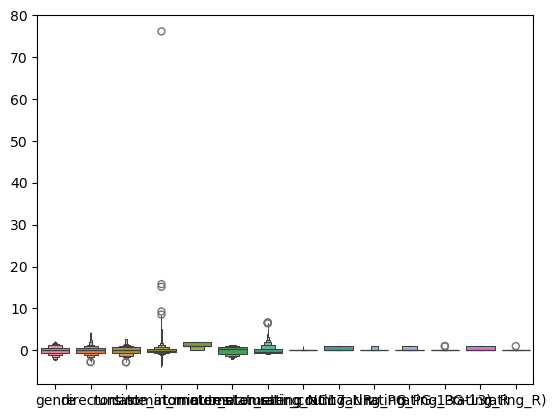

In [17]:
#outlier detection and treatment

sns.boxenplot(data_encoded)

In [18]:


# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_encoded, y, test_size=0.2, random_state=42)

# Handle outliers in the training data only
# Ensure you're working with numeric columns only
X_train_numeric = X_train.select_dtypes(include=[np.number])  # Select numeric columns only

# Calculate the IQR for outlier detection in X_train_numeric
Q1_train = X_train_numeric.quantile(0.25)
Q3_train = X_train_numeric.quantile(0.75)
IQR_train = Q3_train - Q1_train

# Define the lower and upper bounds for outliers in X_train
lower_bound_train = Q1_train - 1.5 * IQR_train
upper_bound_train = Q3_train + 1.5 * IQR_train

# Remove rows with outliers based on the IQR from X_train_numeric
X_train_no_outliers = X_train[~((X_train_numeric < lower_bound_train) | (X_train_numeric > upper_bound_train)).any(axis=1)]

# Align y_train with the cleaned X_train_no_outliers
y_train_no_outliers = y_train[X_train_no_outliers.index]

# Now X_train_no_outliers and y_train_no_outliers are cleaned from outliers


In [19]:


#Apply Log Transformation to Numeric Columns in X_train
# Ensure you're working with numeric columns only
X_train_numeric = X_train.select_dtypes(include=[np.number])  # Select numeric columns only

# Apply log transformation, adding 1 to avoid issues with zero values
X_train_log = X_train_numeric.apply(lambda x: np.log1p(x))  # np.log1p(x) is log(x + 1)

# Check the distribution of transformed data
print(X_train_log.describe())



              genre     directors          cast  runtime_in_minutes  \
count  11600.000000  11115.000000  10880.000000        12748.000000   
mean      -0.094936     -0.030547     -0.009585           -0.186041   
std        0.927281      0.899528      0.976766            0.766153   
min       -2.836241     -7.122603     -4.243667           -3.872057   
25%       -0.577873     -0.419663     -0.349471           -0.611244   
50%        0.267140      0.172985      0.265185           -0.100967   
75%        0.569857      0.567997      0.643056            0.326191   
max        1.151375      1.687383      1.335151            4.346086   

       tomatometer_status  tomatometer_rating  tomatometer_count  \
count        13309.000000        10607.000000       13309.000000   
mean             0.746236            0.067950          -0.387266   
std              0.392621            0.963036           0.840539   
min              0.000000           -5.461232          -1.502649   
25%              0.6

C:\Users\milin\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [20]:
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(3328,)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
models={'LinearRegression':LinearRegression(),
       'DecisionTreeRegressor':DecisionTreeRegressor(),
       'RandomForestRegressor':RandomForestRegressor(),
       'GradientBoostingRegressor':GradientBoostingRegressor(),
       'AdaBoostRegressor':AdaBoostRegressor()}

In [23]:
results = {}

# Loop through models, fit, predict and evaluate
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the train set
    y_train_pred = model.predict(X_train)
    
    # Predict on the test set
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics for train set
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Calculate metrics for test set
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Store results
    results[model_name] = {
        'Train MSE': train_mse,
        'Train R^2 Score': train_r2,
        'Test MSE': test_mse,
        'Test R^2 Score': test_r2,
        'Train Predictions': y_train_pred,
        'Test Predictions': y_test_pred
    }

# Print out the results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Train Mean Squared Error: {metrics['Train MSE']}")
    print(f"  Train R^2 Score: {metrics['Train R^2 Score']}")
    print(f"  Test Mean Squared Error: {metrics['Test MSE']}")
    print(f"  Test R^2 Score: {metrics['Test R^2 Score']}")
    print('-' * 30)


LinearRegression:
  Train Mean Squared Error: 40.33017462778354
  Train R^2 Score: 0.9027168409363726
  Test Mean Squared Error: 36.803346474162865
  Test R^2 Score: 0.9087857993166187
------------------------------
DecisionTreeRegressor:
  Train Mean Squared Error: 4.308151429998461e-28
  Train R^2 Score: 1.0
  Test Mean Squared Error: 3.0492344814457946
  Test R^2 Score: 0.9924427120746604
------------------------------
RandomForestRegressor:
  Train Mean Squared Error: 0.2926927448777589
  Train R^2 Score: 0.9992939759096134
  Test Mean Squared Error: 2.0719766890823355
  Test R^2 Score: 0.9948647686790677
------------------------------
GradientBoostingRegressor:
  Train Mean Squared Error: 1.3643879651930964
  Train R^2 Score: 0.9967088669298511
  Test Mean Squared Error: 2.325213007186546
  Test R^2 Score: 0.994237142374593
------------------------------
AdaBoostRegressor:
  Train Mean Squared Error: 17.550018273072013
  Train R^2 Score: 0.9576664064813482
  Test Mean Squared Erro

In [24]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

# Hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Grid search for Random Forest
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

# Grid search for Gradient Boosting
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_gb.fit(X_train, y_train)

# Best models
best_rf = grid_search_rf.best_estimator_
best_gb = grid_search_gb.best_estimator_

# Predict on train and test sets for RF
y_train_pred_rf = best_rf.predict(X_train)
y_test_pred_rf = best_rf.predict(X_test)

# Predict on train and test sets for GB
y_train_pred_gb = best_gb.predict(X_train)
y_test_pred_gb = best_gb.predict(X_test)

# Calculate metrics for Random Forest
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

# Calculate metrics for Gradient Boosting
train_mse_gb = mean_squared_error(y_train, y_train_pred_gb)
train_r2_gb = r2_score(y_train, y_train_pred_gb)
test_mse_gb = mean_squared_error(y_test, y_test_pred_gb)
test_r2_gb = r2_score(y_test, y_test_pred_gb)

# Print out the results
print("Random Forest Results:")
print(f"  Best Parameters: {grid_search_rf.best_params_}")
print(f"  Train Mean Squared Error: {train_mse_rf}")
print(f"  Train R^2 Score: {train_r2_rf}")
print(f"  Test Mean Squared Error: {test_mse_rf}")
print(f"  Test R^2 Score: {test_r2_rf}")
print('-' * 30)

print("Gradient Boosting Results:")
print(f"  Best Parameters: {grid_search_gb.best_params_}")
print(f"  Train Mean Squared Error: {train_mse_gb}")
print(f"  Train R^2 Score: {train_r2_gb}")
print(f"  Test Mean Squared Error: {test_mse_gb}")
print(f"  Test R^2 Score: {test_r2_gb}")
print('-' * 30)

# first 10 predictions for both models
print("Random Forest - Train Predictions (first 10):", y_train_pred_rf[:10])
print("Random Forest - Test Predictions (first 10):", y_test_pred_rf[:10])
print("Gradient Boosting - Train Predictions (first 10):", y_train_pred_gb[:10])
print("Gradient Boosting - Test Predictions (first 10):", y_test_pred_gb[:10])


C:\Users\milin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
412 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\milin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\milin\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\milin\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\milin\anaconda3\Lib\site-packa

Random Forest Results:
  Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
  Train Mean Squared Error: 1.0177921540009793
  Train R^2 Score: 0.9975449142751002
  Test Mean Squared Error: 7.6791167001849026
  Test R^2 Score: 0.980967913006131
------------------------------
Gradient Boosting Results:
  Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
  Train Mean Squared Error: 1.2319448312266374
  Train R^2 Score: 0.9970283420272802
  Test Mean Squared Error: 2.1292287183123175
  Test R^2 Score: 0.9947228740258904
------------------------------
Random Forest - Train Predictions (first 10): [61.96207385 77.415      55.04235795 42.71735795 39.905      28.765
 67.06       24.62235795 63.0597159  55.2994318 ]
Random Forest - Test Predictions (first 10): [44.48       89.06       71.9        86.565      64.4797159  74.36
 88.94       89.73       56.97886359 65.8097159 ]
Gradient Boosting - 